In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [52]:
df_index=pd.read_csv("economic_index.csv")

In [53]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [54]:
## Drop unneccasary columns
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [55]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [56]:
## check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

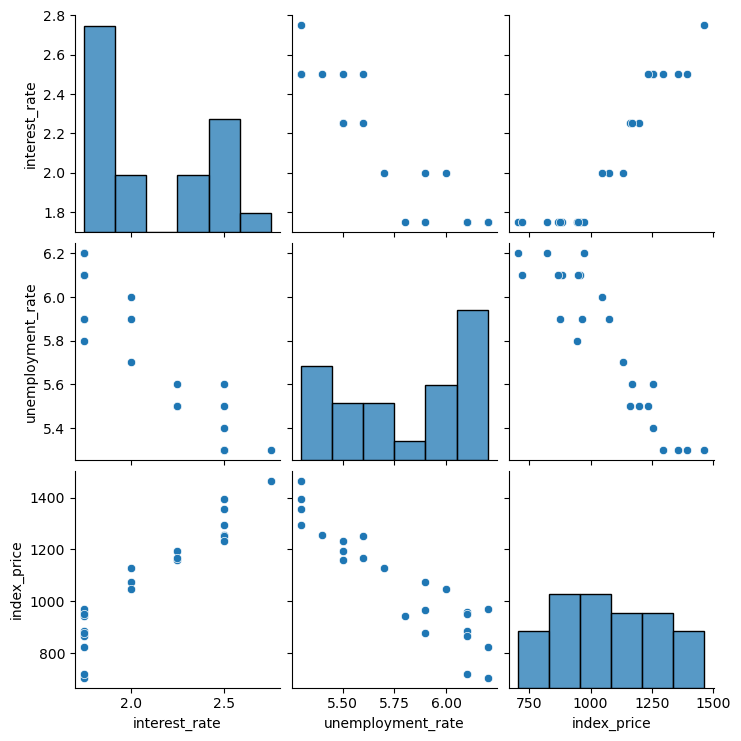

In [57]:
## Visualize
import seaborn as sns
sns.pairplot(df_index)

In [58]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

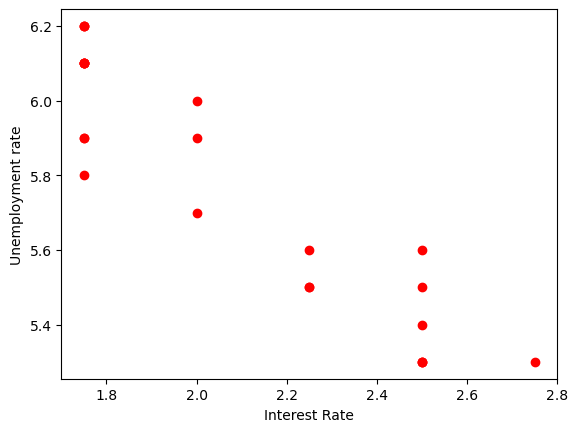

In [59]:
## Visualize the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment rate")

### Independent & Dependent features

In [60]:
#X = df_index[['interest_rate','unemployment_rate']]
X = df_index.iloc[:,:-1]

In [61]:
y = df_index.iloc[:,-1]

In [62]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [63]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

### Train Test Split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [66]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

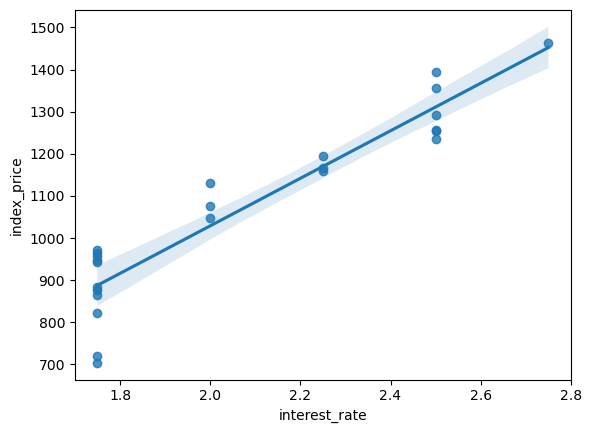

In [67]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

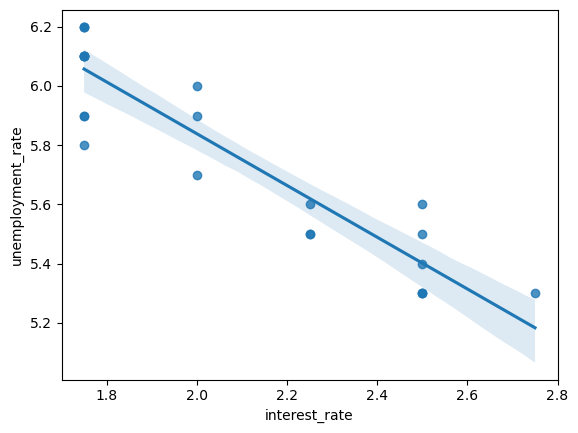

In [68]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [71]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
regression = LinearRegression()

In [74]:
regression.fit(X_train,y_train)

LinearRegression()

In [75]:
##cross validation 
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [76]:
np.mean(validation_score)

-5914.828180162396

In [77]:
## prediction
y_pred = regression.predict(X_test)

In [78]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

### Performance Metrics

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [80]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306611
73.80444932337099
90.04758423359624


In [81]:
from sklearn.metrics import r2_score

In [82]:
score = r2_score(y_test,y_pred)
print(score)

0.7591371539010254


In [83]:
## Displaying adjusted R-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5985619231683756

### Assumptions

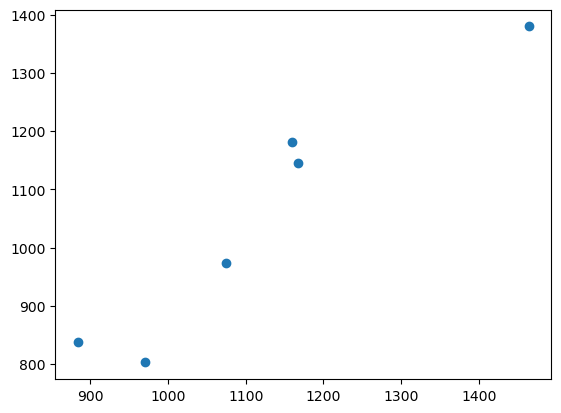

In [84]:
plt.scatter(y_test,y_pred)   ## linear relation

In [85]:
y_test

8     1159
16     971
0     1464
18     884
11    1075
9     1167
Name: index_price, dtype: int64

In [86]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [87]:
residual = y_test-y_pred
print(residual)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


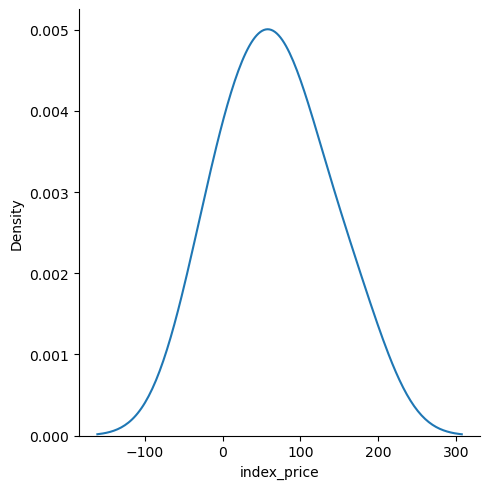

In [89]:
sns.displot(residual,kind='kde')   ##Normal Distribution

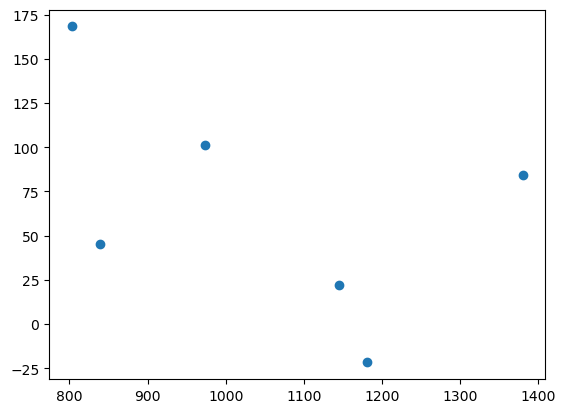

In [91]:
## Scatter plot w.r.t prediction and residual  (Uniformly distributed, not follow patters)
plt.scatter(y_pred,residual)

### OLS Technique LR

In [93]:
import statsmodels.api as sm

In [94]:
model = sm.OLS(y_train,X_train).fit()

In [95]:
prediction = model.predict(X_test)
print(prediction)

[ 127.30223686 -250.70164745  326.390126   -214.91844842  -79.59130481
   91.51903783]


In [96]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 24 Sep 2024   Prob (F-statistic):                       0.754
Time:                        10:03:20   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\HP\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [97]:
print(regression.coef_)

[  88.27275507 -116.25716066]
